# Kaya identity

The Kaya identity is a breakdown of emissions into driving factors expressed as:

$\text{Emissions} = \text{Population}\big(\frac{GDP}{\text{Population}}\big)\big(\frac{Energy}{GDP}\big)\big(\frac{\text{Emissions}}{Energy}\big)$

The identity breaks emissions into drivers:
- Population
- Affluence $\big(\frac{GDP}{\text{Population}}\big)$
- Economy-wide energy intensity $\big(\frac{Energy}{GDP}\big)$
- Carbon intensity of energy $\big(\frac{\text{Emissions}}{Energy}\big)$

## Modified Kaya identity

Add dimensionless term for fraction of energy consumption from renewables

$\text{Emissions} = \text{Population}\big(\frac{GDP}{\text{Population}}\big)\big(\frac{Energy}{GDP}\big)\big(\frac{\text{Emissions}}{Energy}\big)\big(\frac{\text{Renewables}}{\text{Energy}}\big)$

The identity breaks emissions into drivers:
- Population
- Affluence $\big(\frac{GDP}{\text{Population}}\big)$
- Economy-wide energy intensity $\big(\frac{Energy}{GDP}\big)$
- Carbon intensity of energy $\big(\frac{\text{Emissions}}{Energy}\big)$
- Fraction of renewable energy $\big(\frac{\text{Renewables}}{\text{Energy}}\big)$

In [20]:
import matplotlib.pyplot as plt
import os
import pandas as pd
%matplotlib inline

# Read data

In [12]:
fl = os.path.abspath('../data/processed/kaya_identity.csv')
df_out = pd.read_csv(fl)

# make plots

In [106]:
actor_id = 'CN'

In [107]:
df_tmp = df_out.loc[df_out['actor_id'] == actor_id]

## Kaya identity

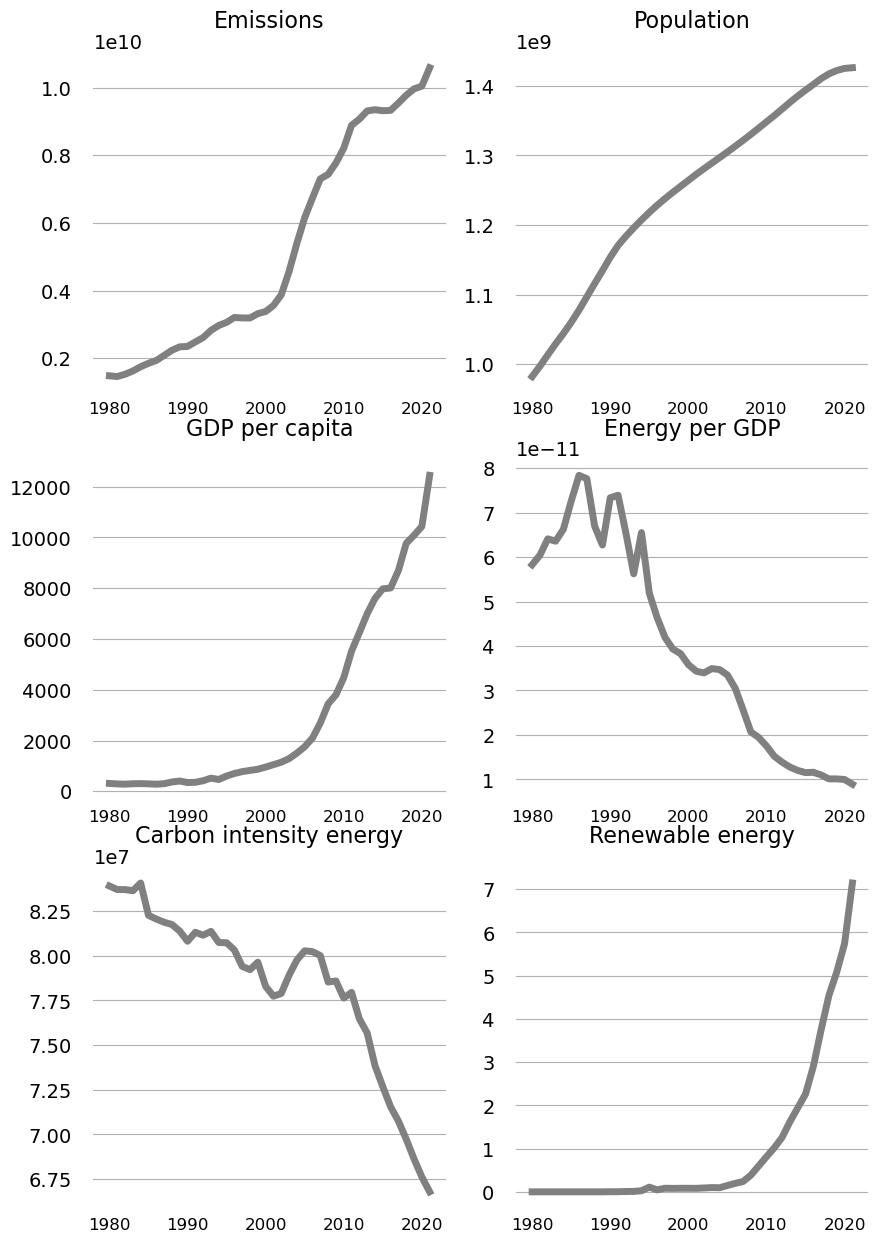

In [108]:
params = dict(
    linestyle = '-',
    linewidth = 5,
    c = [0.5,0.5,0.5]
)
with plt.style.context("./custom_style.mplstyle"):
    #fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    fig = plt.figure(figsize=(10,15)) 
    
    ax = fig.add_subplot(321)
    ax.plot(df_tmp['year'], df_tmp['total_emissions'], **params)
    ax.set_title('Emissions', fontsize=16)
    
    ax = fig.add_subplot(322)
    ax.plot(df_tmp['year'], df_tmp['population'], **params)
    ax.set_title('Population', fontsize=16)

    ax = fig.add_subplot(323)
    ax.plot(df_tmp['year'], df_tmp['gdp_per_pop'], **params)
    ax.set_title('GDP per capita', fontsize=16)
    
    ax = fig.add_subplot(324)
    ax.plot(df_tmp['year'], df_tmp['energy_per_gdp'], **params)
    ax.set_title('Energy per GDP', fontsize=16)
    
    ax = fig.add_subplot(325)
    ax.plot(df_tmp['year'], df_tmp['emissions_per_energy'], **params)
    ax.set_title('Carbon intensity energy', fontsize=16)
    
    ax = fig.add_subplot(326)
    ax.plot(df_tmp['year'], df_tmp['renewables_per_energy']*100, **params)
    ax.set_title('Renewable energy', fontsize=16)


# Look at all countries

In [31]:
df_2021 = df_out.loc[df_out['year'] == 2021]

## "GDP per pop" versus "carbon intensity of energy"

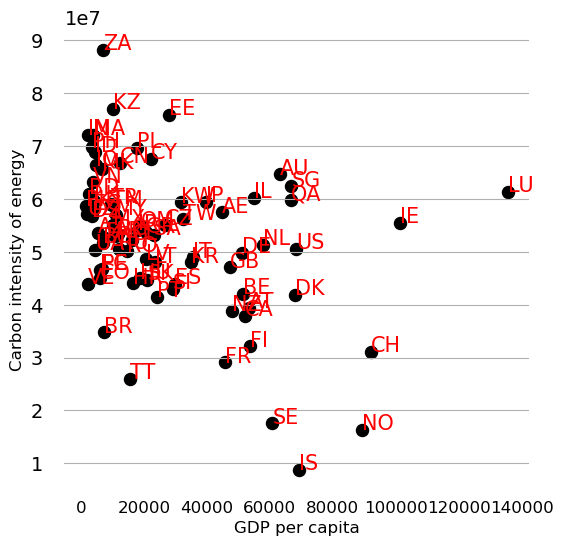

In [68]:
params = dict(
    marker= 'o',
    s = 75,
    c = 'k'
)

actor_ids = list(df_2021['actor_id'])

with plt.style.context("./custom_style.mplstyle"):
    fig = plt.figure(figsize=(6,6)) 
    ax = fig.add_subplot(111)
    ax.scatter(df_2021['gdp_per_pop'], df_2021['emissions_per_energy'], **params)
    for i, txt in enumerate(actor_ids):
        ax.annotate(txt, (df_2021['gdp_per_pop'].iloc[i], df_2021['emissions_per_energy'].iloc[i]), c='r', size=15)

    ax.set_xlabel('GDP per capita', fontsize=12)
    ax.set_ylabel('Carbon intensity of energy', fontsize=12)
    #ax.plot(df_tmp['year'], df_tmp['total_emissions'], **params)
    #ax.set_title('Total emissions', fontsize=16)
    

## "GDP per pop" versus "Emissions per GDP"

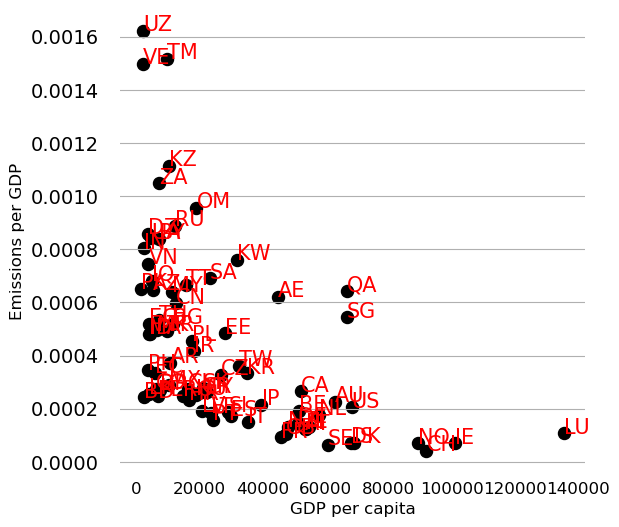

In [82]:
params = dict(
    marker= 'o',
    s = 75,
    c = 'k'
)

actor_ids = list(df_2021['actor_id'])

with plt.style.context("./custom_style.mplstyle"):
    fig = plt.figure(figsize=(6,6)) 
    ax = fig.add_subplot(111)
    ax.scatter(df_2021['gdp_per_pop'], df_2021['energy_per_gdp']*df_2021['emissions_per_energy'], **params)
    for i, txt in enumerate(actor_ids):
        ax.annotate(txt, (df_2021['gdp_per_pop'].iloc[i], df_2021['energy_per_gdp'].iloc[i]*df_2021['emissions_per_energy'].iloc[i]), c='r', size=15)

    ax.set_xlabel('GDP per capita', fontsize=12)
    ax.set_ylabel('Emissions per GDP', fontsize=12)

## "GDP per pop" versus "Fraction of renewable energy"

In [85]:
df_2021.columns

Index(['index', 'actor_id', 'name', 'year', 'total_emissions', 'population',
       'gdp', 'energy_consumption_EJ', 'renewable_consumption_EJ',
       'emissions_per_pop', 'gdp_per_pop', 'energy_per_gdp',
       'emissions_per_energy', 'population_per_emissions',
       'renewables_per_energy'],
      dtype='object')

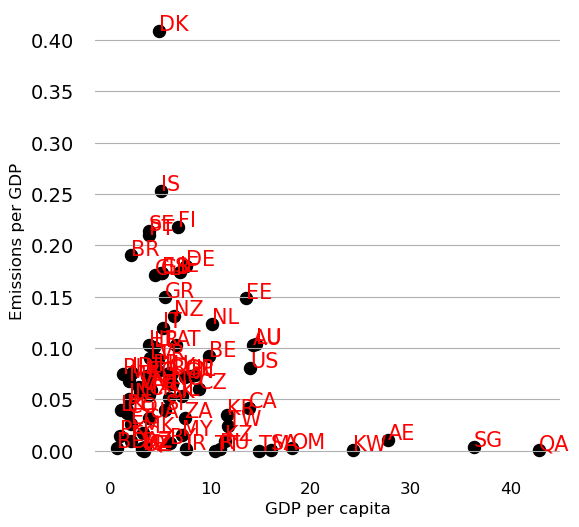

In [90]:
params = dict(
    marker= 'o',
    s = 75,
    c = 'k'
)

actor_ids = list(df_2021['actor_id'])

with plt.style.context("./custom_style.mplstyle"):
    fig = plt.figure(figsize=(6,6)) 
    ax = fig.add_subplot(111)
    ax.scatter(df_2021['emissions_per_pop'], df_2021['renewables_per_energy'], **params)
    for i, txt in enumerate(actor_ids):
        ax.annotate(txt, (df_2021['emissions_per_pop'].iloc[i], df_2021['renewables_per_energy'].iloc[i]), c='r', size=15)

    ax.set_xlabel('GDP per capita', fontsize=12)
    ax.set_ylabel('Emissions per GDP', fontsize=12)